In [3]:
# Import the Quant library. This will give us access to millions of financial 
# and economic datasets from hundreds of publishers directly into Python
import quandl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction
In this notebook we will use real data from Bitcoin prices.

From Quandl we can download the data for different bitcoin markets:
https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD

In [4]:
# use the method ".get" to retrieve a data set
# first argument: is the name of the dataset that we want to retrieve (see documentation)
# second argument: the format to return the data 
df = quandl.get('BCHARTS/KRAKENUSD', returns="pandas")

inspecting the different datatypes in the dataframe

In [5]:
# Overview of the data. Show first five rows
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


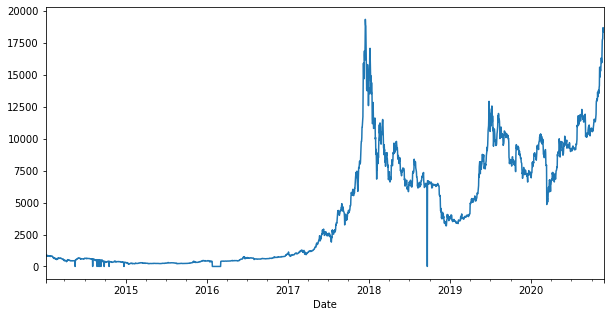

In [6]:
# Plot the close values in a plor of size 10x5
df['Close'].plot(figsize=(10,5));

There are a few notable down-spikes, particularly in late 2014 and early 2016. These spikes are specific to the Kraken dataset, and we obviously don't want them to be reflected in our overall pricing analysis.
<b>Let's remove the values where the Bitcoin is zero</b>

In [7]:
# Create a variable name index with the value "True" whereever the price equals 0
idx = df['Close'] == 0

In [8]:
# In sums, all the True values are taken as 1 and the False values are taken as 0  
print('There are ',sum(idx), ' such observations in the dataset')

There are  49  such observations in the dataset


In [9]:
# Drop the 0 values, first, we will point to them using the method ".loc" this will receive our list of 
# booleans and the method ".index" will return the numerical index of the values with a True.
# This will be the firs argument of the "drop" method.
# Axis argument: tells what kind of dropping we want (0 is rows and 1 means columns)
# inplace argument: will store the ourcome in the dataframe itself
df.drop(df.loc[idx].index, axis=0, inplace=True)

In [10]:
# In the same way we verify if there are any 0s after our cleaning process
idx = df['Close'] == 0
print('Check: There are ',sum(idx), ' such observations in the dataset')

Check: There are  0  such observations in the dataset


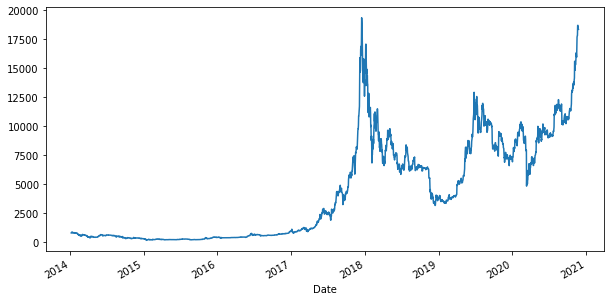

In [11]:
# Plot the close prices
df['Close'].plot(figsize=(10,5));

<h3>Pulling different Exchanges together in one single dataframe </h3>


In [12]:
# Create a list with the names of different exchanges
exchanges = ['COINBASE','BITSTAMP','ITBIT','KRAKEN']

In [13]:
# Create an empty dictionary to store the results later on
exchange_data = dict()

# Iterate over our list of exchanges
for exchange in exchanges:
    exchange_code = 'BCHARTS/'+exchange+'USD'
    # Extract the data for each exchange
    df_exchange = quandl.get(exchange_code,returns="pandas")
    # Store the outcome in our dictionary where the key is the name of the exchange
    exchange_data[exchange] = df_exchange

The results of the 4 different exchanges are stored in a dictionary :


In [14]:
# Print the keys of a dictionary with the method ".keys()"
exchange_data.keys()

dict_keys(['COINBASE', 'BITSTAMP', 'ITBIT', 'KRAKEN'])

In [15]:
# First 5 rows
exchange_data['COINBASE'].head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2015-02-04,228.77,230.25,221.85,227.11,3344.120783,7.578076e+05,226.608934
2015-05-11,241.59,245.49,239.50,242.86,6176.481242,1.498052e+06,242.541273
2015-05-12,242.74,243.40,240.37,242.03,6322.571412,1.531046e+06,242.155569
2015-05-13,242.04,244.13,235.54,236.32,10028.946883,2.424123e+06,241.712609
2015-05-14,236.93,240.00,232.61,237.46,10365.968041,2.462002e+06,237.508205


Examine the columns in the DataaFrame

In [16]:
# Iterate over all the exchanges and prit the content
for d in exchange_data.keys():
    print(d)
    print(exchange_data[d].columns)

COINBASE
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')
BITSTAMP
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')
ITBIT
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')
KRAKEN
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')


We would like to have this data in a Data Frame format to manipulate it and analyse it. Put these together in one dataframe

In [17]:
# Create an empty data frame to store the results
df = pd.DataFrame()
for d in exchange_data.keys():
    df = pd.concat([df,exchange_data[d]['Close']],axis=1)


In [18]:
# Rename the columns to the names of the exchanges
df.columns = exchanges

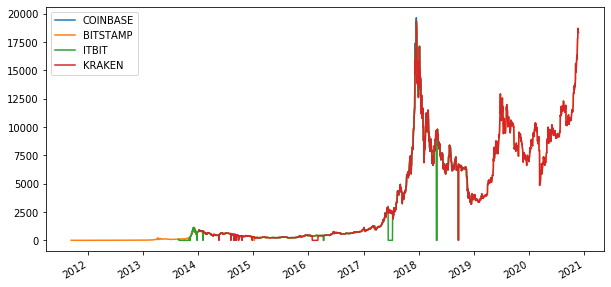

In [19]:
# Plot the dataframe
df.plot(figsize=(10,5));